In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
df = pd.read_csv('Data/processed_data_tobacco.csv')


## Đổi tên cột 'Data_Value' thành 'Tobacco consumption percentage (%)'

In [157]:
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

# tính tổng lượng tiêu thụ thuốc lá (%) cho mỗi nhóm 'TopicDesc' 


In [158]:
data_to_plot = df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum()

## Chỉ lấy các dữ liệu có sử dụng thuốc lá trong dữ liệu khảo sát

In [159]:
if 'Cessation (Youth)' in data_to_plot:
    data_to_plot = data_to_plot.drop('Cessation (Youth)')

# Vẽ biểu đồ thể hiện tỉ lệ sử dụng "Thuốc lá có khói" và "Thuốc lá không khói" trong toàn bộ dữ liệu khảo sát

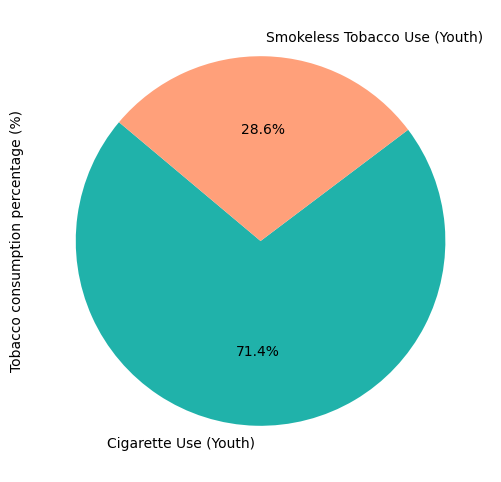

In [160]:
# Tạo biểu đồ pie
plt.figure(figsize=(6, 6))
data_to_plot.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightseagreen', 'lightsalmon'])
plt.show()


- Đánh giá
    - Trend tiêu dùng thuốc lá: Sự phân bố không đồng đều giữa các phương thức sử dụng thuốc lá. Sự dụng thuốc lá có khói chiếm tỷ lệ cao 71.4%, sử dụng thuốc lá không khói thấp chỉ 28.6%

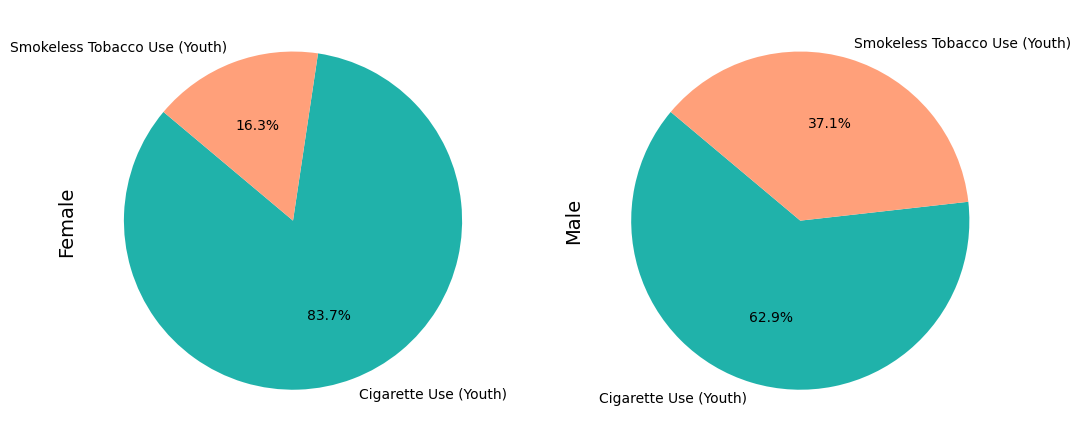

In [161]:
female_data = df[(df['Gender'] == 'Female') & (df['TopicDesc'] != 'Cessation (Youth)')]
male_data = df[(df['Gender'] == 'Male') & (df['TopicDesc'] != 'Cessation (Youth)')]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['lightseagreen', 'lightsalmon'])
axes[0].set_ylabel('Female', fontsize=14)

male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['lightseagreen', 'lightsalmon'])
axes[1].set_ylabel('Male', fontsize=14)

plt.show()


- Đánh giá:
    - Tỉ lệ sử dụng thuốc lá vẫn chiếm ưu thế trên cả 2 giới tính riêng được khảo sát.
    - Tỉ lệ nữ sử dụng thuốc lá không khói ít hơn ti nam sử dụng thuốc lá không khói (16.3 và 37.1)
    - Có thể thấy rõ tỉ lệ sử dụng các loại thuốc của từng giới tính theo từng loại thuốc.

### Chỉ lựa chọn những khảo sát mà liên quan đến có hút thuốc hoặc hút thuốc không khói.

In [162]:
# Loại bỏ các dòng có giá trị 'Cessation (Youth)' trong cột 'TopicDesc'
df_filtered = df[df['TopicDesc'] != 'Cessation (Youth)'].copy()


###  Lấy dữ liệu của các cuộc khảo sát trong khoảng 2010 đến năm mới nhất.

In [163]:

# Lấy năm mới nhất
latest_year = df_filtered['YEAR'].max()

# Lấy các dòng từ năm 2010 đến năm mới nhất
Latest_df = df_filtered.loc[(df_filtered['YEAR'] >= 2010) & (df_filtered['YEAR'] <= latest_year)].copy()


## Tính giá trị trung bình về việc sử dụng các loại thuốc của từng vùng trên những lần khảo sát. 

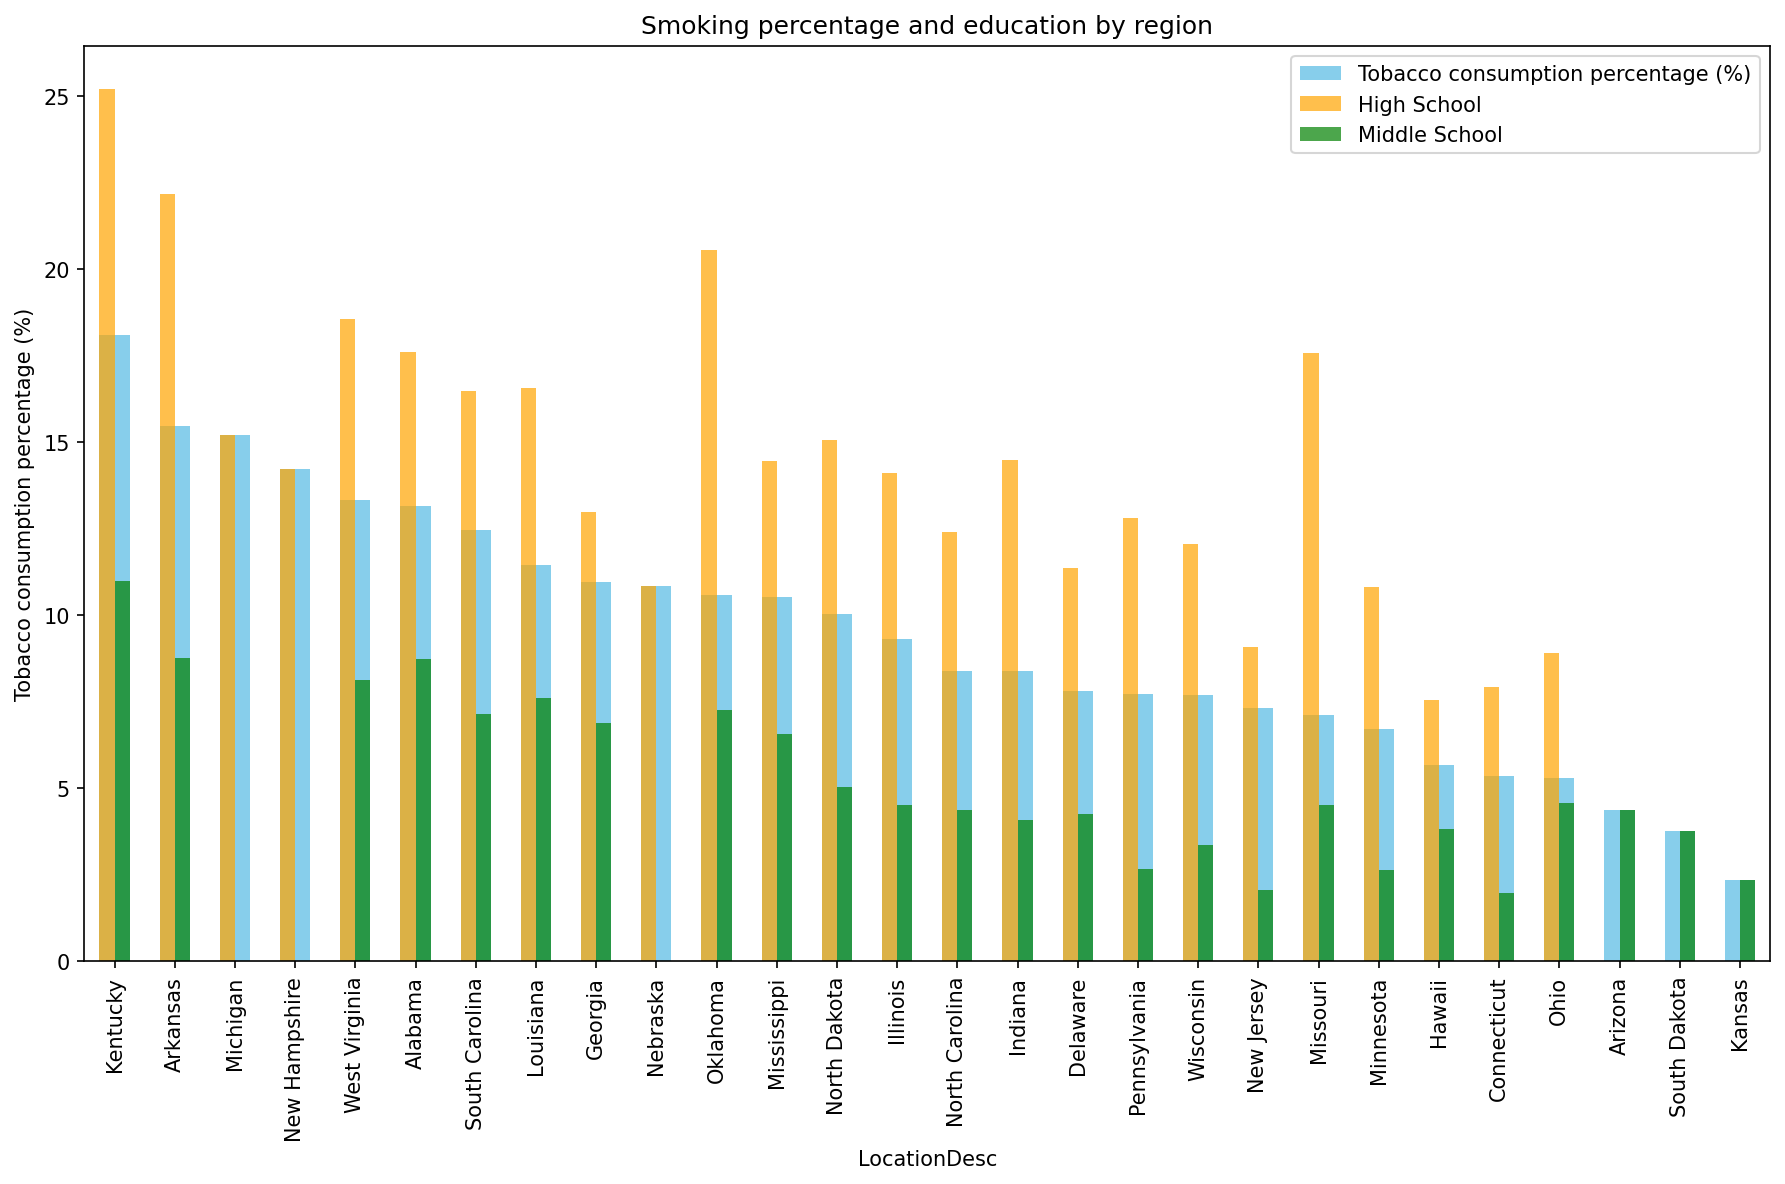

In [164]:
region_smoking = Latest_df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=False)
education_smoking = Latest_df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack().reindex(region_smoking.index)
plt.figure(figsize=(12, 8), dpi=150)
region_smoking.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education_smoking.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)  
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

- Đánh giá:
    - Nhìn chung tỉ lệ giữa việc hút các loại thuốc theo trình độ học vấn có sự chênh lệnh lớn. Hút thuốc ở cấp bậc Hight School chiếm tỉ lệ cao, thường sẽ gấp 2 lần Middle School.
    - Có vài trường hợp cá biệt là chỉ ghi nhận việc hút các loại thuốc ở Middle School.
    - Có thể nhìn được tình hình phân cấp của những người sử dụng các loại thuốc theo độ tuổi. (Vì Education liên quan tới Age)